Shift 0800-1200 (PT), November 14 2020
-------

* Only Kelvin is in the water. Monitoring GPS, boat traffic.

* Teodor reported maneuvering the WG away from a boat

In [7]:
imatlab_export_fig('print-png') 
%% load data [manually access files through ftp client]
%load('\\waveglider2.ucsd.edu\20201100_TFO\KELVIN\KELVIN_PLD_DATA_ALL.mat')
load('/Volumes/20201100_TFO/KELVIN/KELVIN_PLD_DATA_ALL.mat')

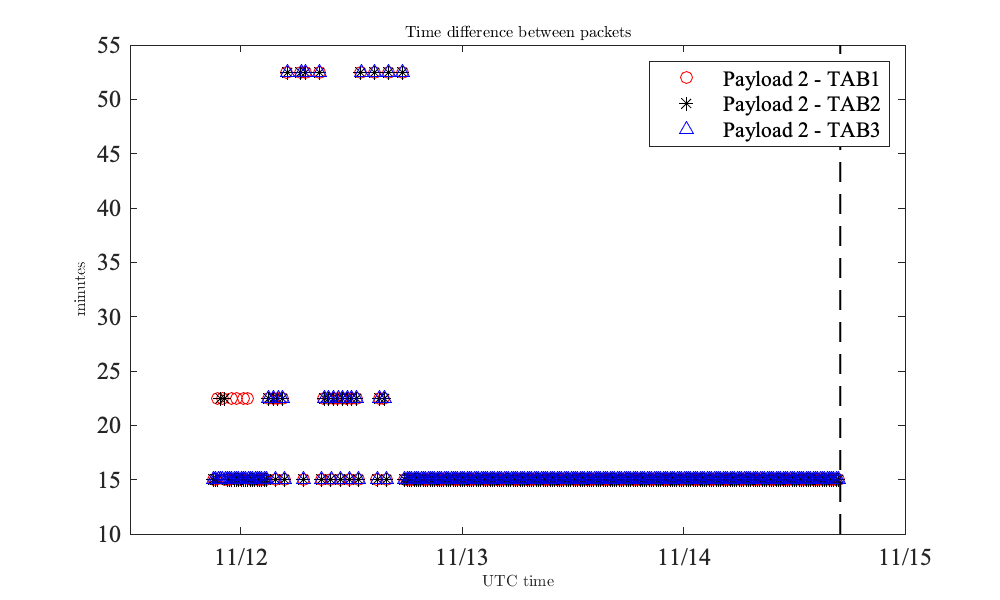

In [8]:
%% plot time difference
figure('Name','KELVIN');
set(gcf,'color',[1 1 1])
plot(KELVIN.PLD2_TAB1.time,gradient(KELVIN.PLD2_TAB1.time)*24*60,'or');
hold on
plot(KELVIN.PLD2_TAB2.time,gradient(KELVIN.PLD2_TAB2.time)*24*60,'*k');
plot(KELVIN.PLD2_TAB3.time,gradient(KELVIN.PLD2_TAB3.time)*24*60,'^b');
b= ylim;
plot([now+datenum(0,0,0,8,0,0) now+datenum(0,0,0,8,0,0)],b,'--k','linewidth',1)
legend('Payload 2 - TAB1','Payload 2 - TAB2','Payload 2 - TAB3')
set(gca,'fontname','times','FontSize',12)

xlabel('UTC time','interpreter','latex','fontname', 'times','fontsize',8)
ylabel('minutes','interpreter','latex','fontname', 'times','fontsize',8)
title('Time difference between packets','interpreter','latex','fontname', 'times','fontsize',8)
datetick('keeplimits') 
set(gcf, 'color', 'w');
set(gcf, 'Position',  [0, 0, 500, 300])

In [9]:
%% remove bad files

st_time = datenum(2020,11,12,3,0,0);
ed_time = datenum(2020,11,12,18,0,0);


% TAB 1
min_selected = 31; % define
f=fieldnames(KELVIN.PLD2_TAB1);
t=find(KELVIN.PLD2_TAB1.minute~=min_selected | KELVIN.PLD2_TAB1.time<st_time | KELVIN.PLD2_TAB1.time>ed_time);

for i=1:length(f)
    eval(['l = size(KELVIN.PLD2_TAB1.',f{i},');']);
    if l(1)>1
        eval(['KELVIN.PLD2_TAB1.',f{i},'=KELVIN.PLD2_TAB1.',f{i},'(:,t);']);
    else
        eval(['KELVIN.PLD2_TAB1.',f{i},'=KELVIN.PLD2_TAB1.',f{i},'(t);']);
    end
end
% TAB 2
min_selected = 32; % define
f=fieldnames(KELVIN.PLD2_TAB2);
t=find(KELVIN.PLD2_TAB2.minute~=min_selected | KELVIN.PLD2_TAB2.time<st_time | KELVIN.PLD2_TAB2.time>ed_time);

for i=1:length(f)
    eval(['l = size(KELVIN.PLD2_TAB2.',f{i},');']);
    if l(1)==1
        eval(['KELVIN.PLD2_TAB2.',f{i},'=KELVIN.PLD2_TAB2.',f{i},'(t);']);
    else
        eval(['KELVIN.PLD2_TAB2.',f{i},'=KELVIN.PLD2_TAB2.',f{i},'(:,t);']);
    end
end
% TAB 3
min_selected = 33; % define
f=fieldnames(KELVIN.PLD2_TAB3);
t=find(KELVIN.PLD2_TAB3.minute~=min_selected | KELVIN.PLD2_TAB3.time<st_time | KELVIN.PLD2_TAB3.time>ed_time);

for i=1:length(f)
     eval(['l = size(KELVIN.PLD2_TAB3.',f{i},');']);
    if l(1)==1
        eval(['KELVIN.PLD2_TAB3.',f{i},'=KELVIN.PLD2_TAB3.',f{i},'(t);']);
    else
        eval(['KELVIN.PLD2_TAB3.',f{i},'=KELVIN.PLD2_TAB3.',f{i},'(:,t);']);
    end
end

In [11]:
% SV2 tchain depth
z_t = [0.344, 0.604, 0.814, 1.004, 1.514, 2.004, 2.504, 3.244, 3.994, 4.734, 5.734, 7.49, 11.48, 15.48, 19.48, 23.48, 27.48, 31.48, 35.48, 39.48, 43.48];
%% SV2 tchain depth
z_t = [0.344, 0.604, 0.814, 1.004, 1.514, 2.004, 2.504, 3.244, 3.994, 4.734, 5.734, 7.49, 11.48, 15.48, 19.48, 23.48, 27.48, 31.48, 35.48, 39.48, 43.48];
%% remove glider depth
KELVIN.PLD2_TAB2.current_east(2,:) = NaN;
KELVIN.PLD2_TAB2.current_north(2,:) = NaN;
t= find(KELVIN.PLD2_TAB2.current_north<-2);
KELVIN.PLD2_TAB2.current_north(t)=NaN;
t= find(KELVIN.PLD2_TAB2.current_east<-2);
KELVIN.PLD2_TAB2.current_east(t)=NaN;


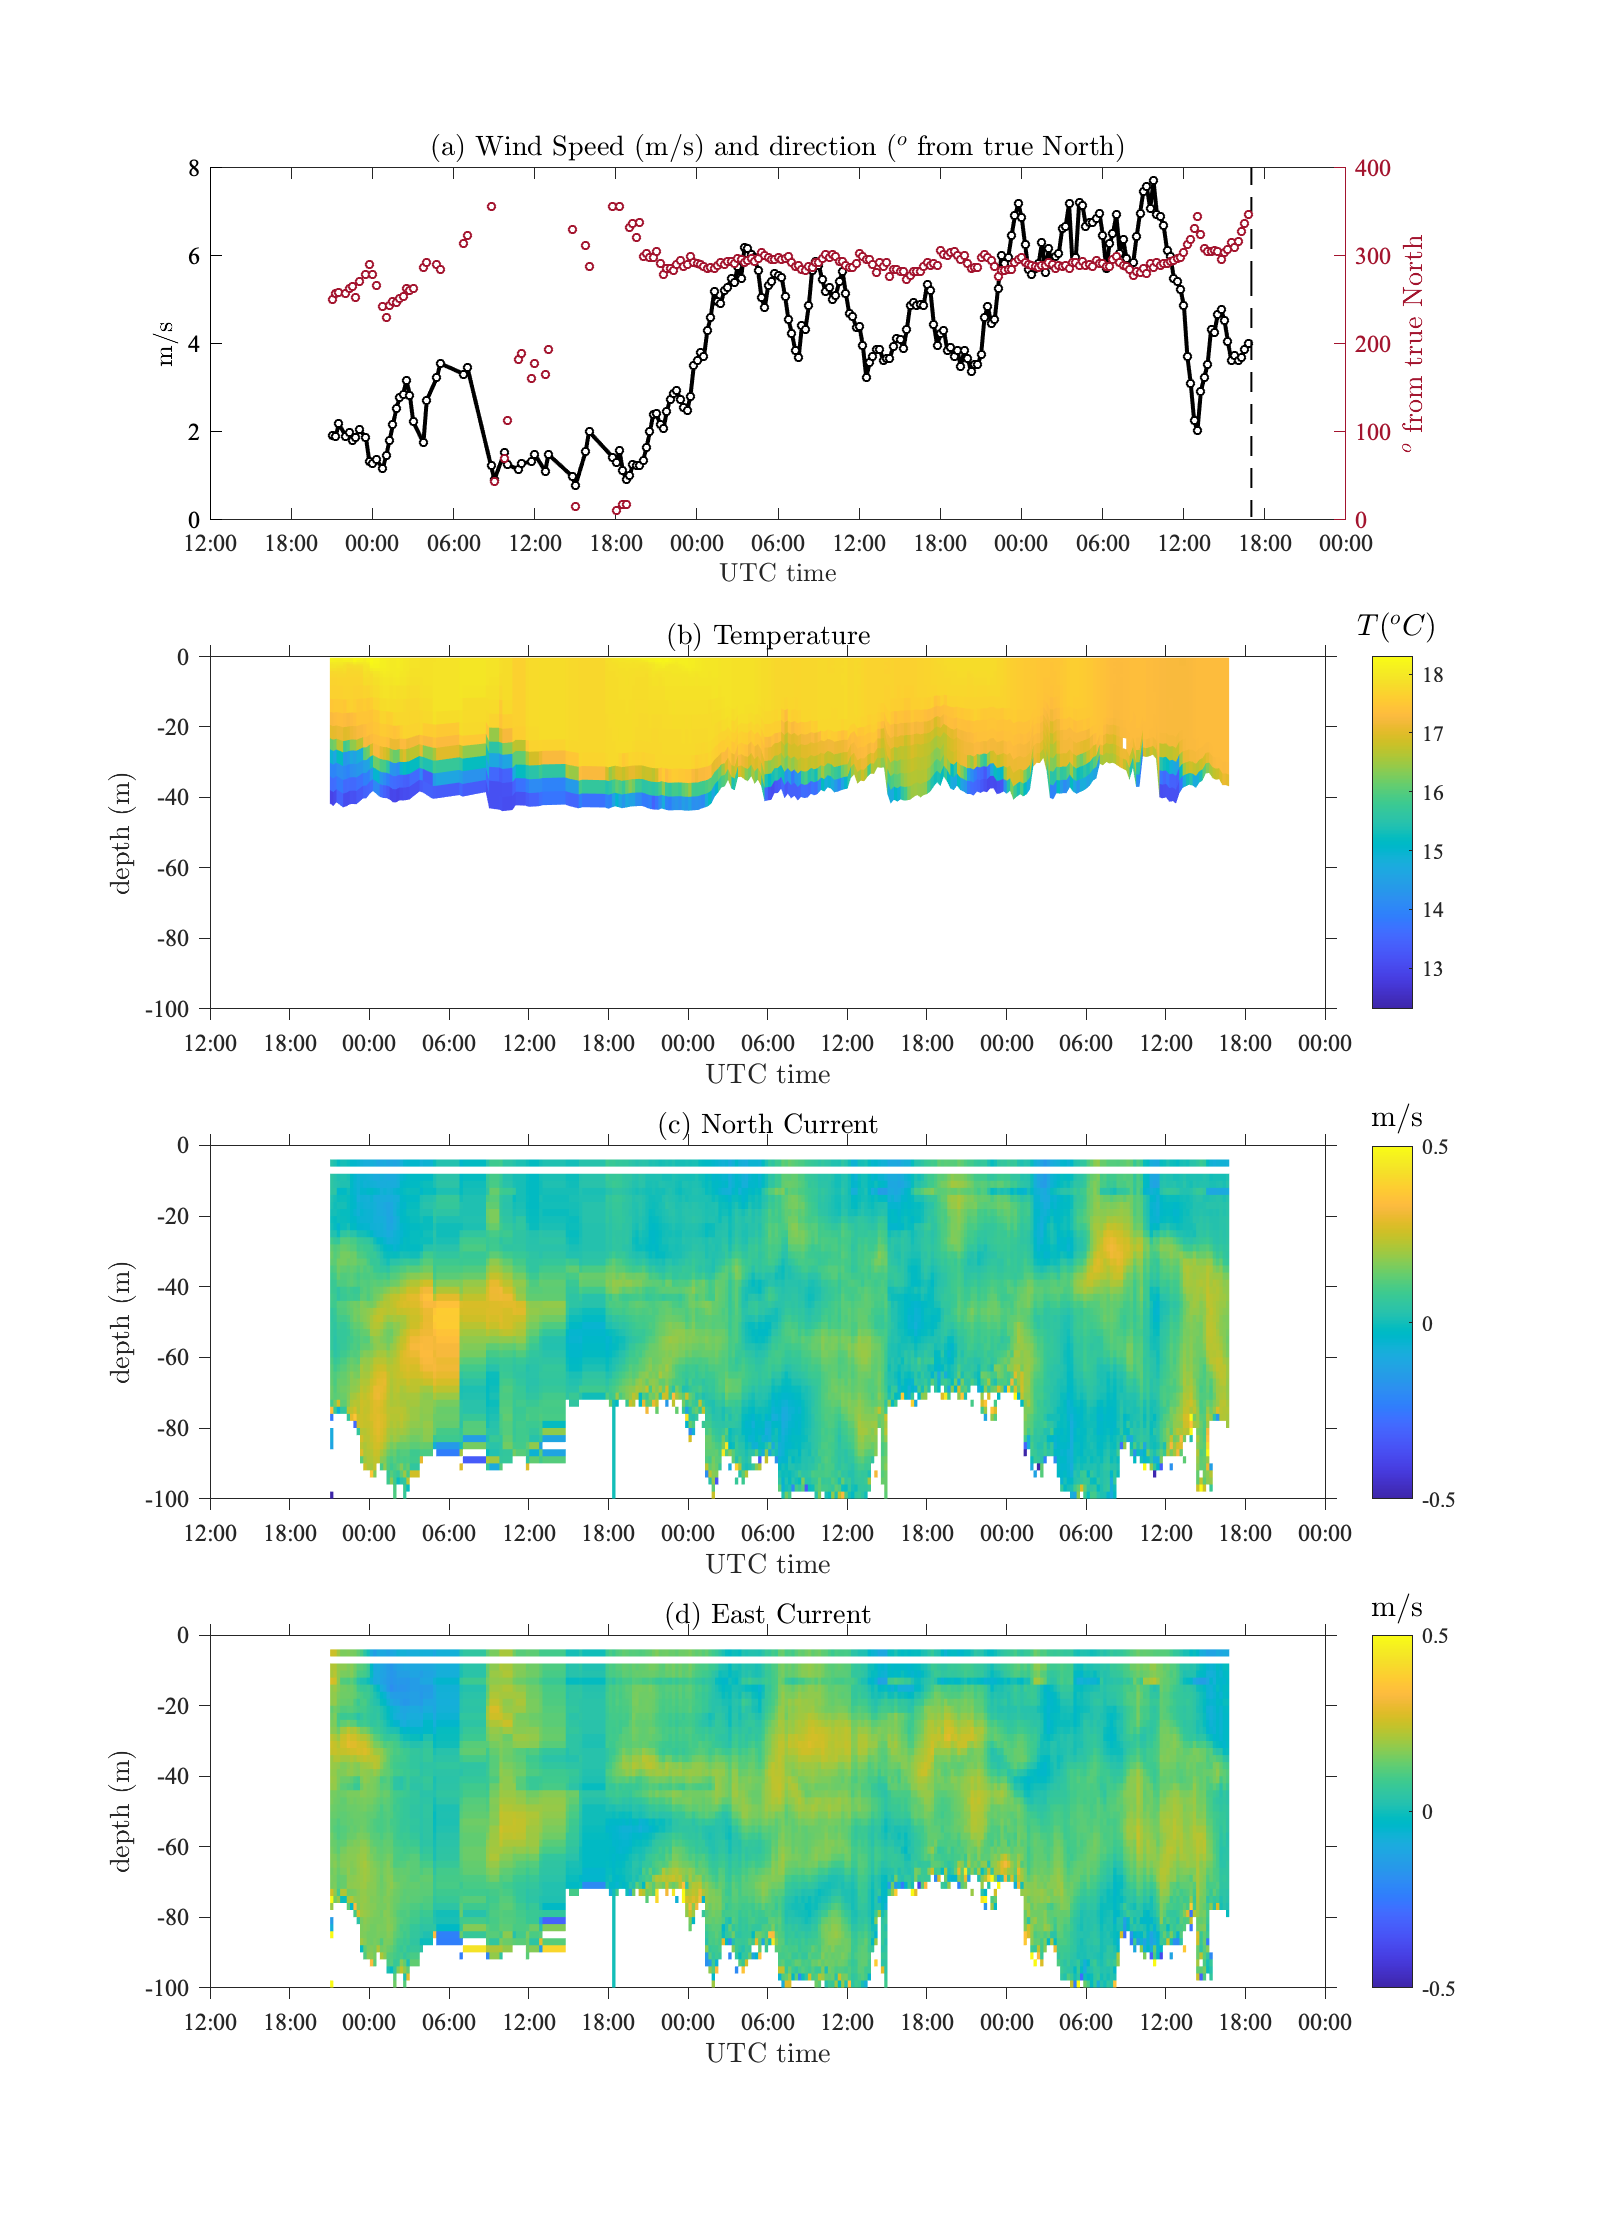

In [12]:
%% ADCP, Tchain, Winds
cd /Users/npizzo/Documents/GitHub/WaveGlider/
figure('Name','KELVIN');
set(gcf,'color',[1 1 1])
set(gcf,'position',[1000 221.6667 807.6667 1.1163e+03])

subplot(4,1,1)

yyaxis left
aaa = get(gca,'position');

plot(KELVIN.PLD2_TAB1.time,KELVIN.PLD2_TAB1.TWS,'k','linewidth',2)
hold on
plot(KELVIN.PLD2_TAB1.time,KELVIN.PLD2_TAB1.TWS,'ok','linewidth',1,'MarkerFaceColor','w','MarkerSize',4)
datetick('keeplimits') 
a=xlim;
b= ylim;
plot([now+datenum(0,0,0,8,0,0) now+datenum(0,0,0,8,0,0)],b,'--k','linewidth',1)
xlabel('UTC time','interpreter','latex','fontname', 'times','fontsize',14)
ylabel('m/s','interpreter','latex','fontname', 'times','fontsize',14)

set(gca,'fontname','times','FontSize',12)
hc = colorbar;
set(hc,'visible','off')
yyaxis right
plot(KELVIN.PLD2_TAB1.time,KELVIN.PLD2_TAB1.TWD,'or','color', [0.64 0.08 0.18],'linewidth',1,'MarkerFaceColor','w','MarkerSize',4)
aaa = get(gca,'position');

datetick('keeplimits') 
ax = gca;
ax.YAxis(1).Color = 'k';
ax.YAxis(2).Color = [0.64 0.08 0.18];

set(gca,'fontname','times','FontSize',12)
ylabel('$^o$ from true North','interpreter','latex','fontname', 'times','fontsize',14)

title('(a) Wind Speed (m/s) and direction ($^o$ from true North)','interpreter','latex','fontname', 'times','fontsize',14)

subplot(4,1,2)
pcolor(KELVIN.PLD2_TAB1.time,KELVIN.PLD2_TAB1.tchn_z,KELVIN.PLD2_TAB1.tchn_temp);shading flat
% map=flipud(cbrewer('div','Spectral',60));
% colormap(map);
hc  = colorbar;
title(hc,'$T(^oC)$','interpreter','latex','fontname', 'times','fontsize',12)
xlim([a])
set(gca,'TickDir','out');
datetick('keeplimits') 
set(gca,'fontname','times','FontSize',12)
xlabel('UTC time','interpreter','latex','fontname', 'times','fontsize',14)
ylabel('depth (m)','interpreter','latex','fontname', 'times','fontsize',14)
ylim([-100 0])
 title('(b) Temperature','interpreter','latex','fontname', 'times','fontsize',14)
 newposit=get(gca,'position');
 oldposit=get(ax,'position');
 set(ax,'position',[oldposit(1) oldposit(2) newposit(3) oldposit(4)])
 %
 subplot(4,1,3)
% [~,h] = contourf(repmat(KELVIN.PLD2_TAB2.time,[50 1]),KELVIN.PLD2_TAB2.z,KELVIN.PLD2_TAB2.current_north,100);
% set(h,'linestyle','none','LevelList',[-0.5:0.01:0.5])
pcolor(repmat(KELVIN.PLD2_TAB2.time,[50 1]),KELVIN.PLD2_TAB2.z,KELVIN.PLD2_TAB2.current_north);shading flat

% map=flipud(cbrewer('div','Spectral',60));
% colormap(map);
caxis([-0.5 0.5])
hc  = colorbar;
title(hc,'m/s','interpreter','latex','fontname', 'times','fontsize',12)
set(gca,'TickDir','out');
xlim([a])
datetick('keeplimits') 
set(gca,'fontname','times','FontSize',12)
xlabel('UTC time','interpreter','latex','fontname', 'times','fontsize',14)
ylabel('depth (m)','interpreter','latex','fontname', 'times','fontsize',14)
ylim([-100 0])
 title('(c) North Current','interpreter','latex','fontname', 'times','fontsize',14)
 

subplot(4,1,4)
% [~,h] = contourf(repmat(KELVIN.PLD2_TAB2.time,[50 1]),KELVIN.PLD2_TAB2.z,KELVIN.PLD2_TAB2.current_east,100);
% set(h,'linestyle','none','LevelList',[-0.5:0.01:0.5])
pcolor(repmat(KELVIN.PLD2_TAB2.time,[50 1]),KELVIN.PLD2_TAB2.z,KELVIN.PLD2_TAB2.current_east);shading flat
% map=flipud(cbrewer('div','Spectral',60));
% colormap(map);
caxis([-0.5 0.5])
hc  = colorbar;
title(hc,'m/s','interpreter','latex','fontname', 'times','fontsize',12)
set(gca,'TickDir','out');
xlim([a])
datetick('keeplimits') 
set(gca,'fontname','times','FontSize',12)
xlabel('UTC time','interpreter','latex','fontname', 'times','fontsize',14)
ylabel('depth (m)','interpreter','latex','fontname', 'times','fontsize',14)
ylim([-100 0])
 title('(d) East Current','interpreter','latex','fontname', 'times','fontsize',14)


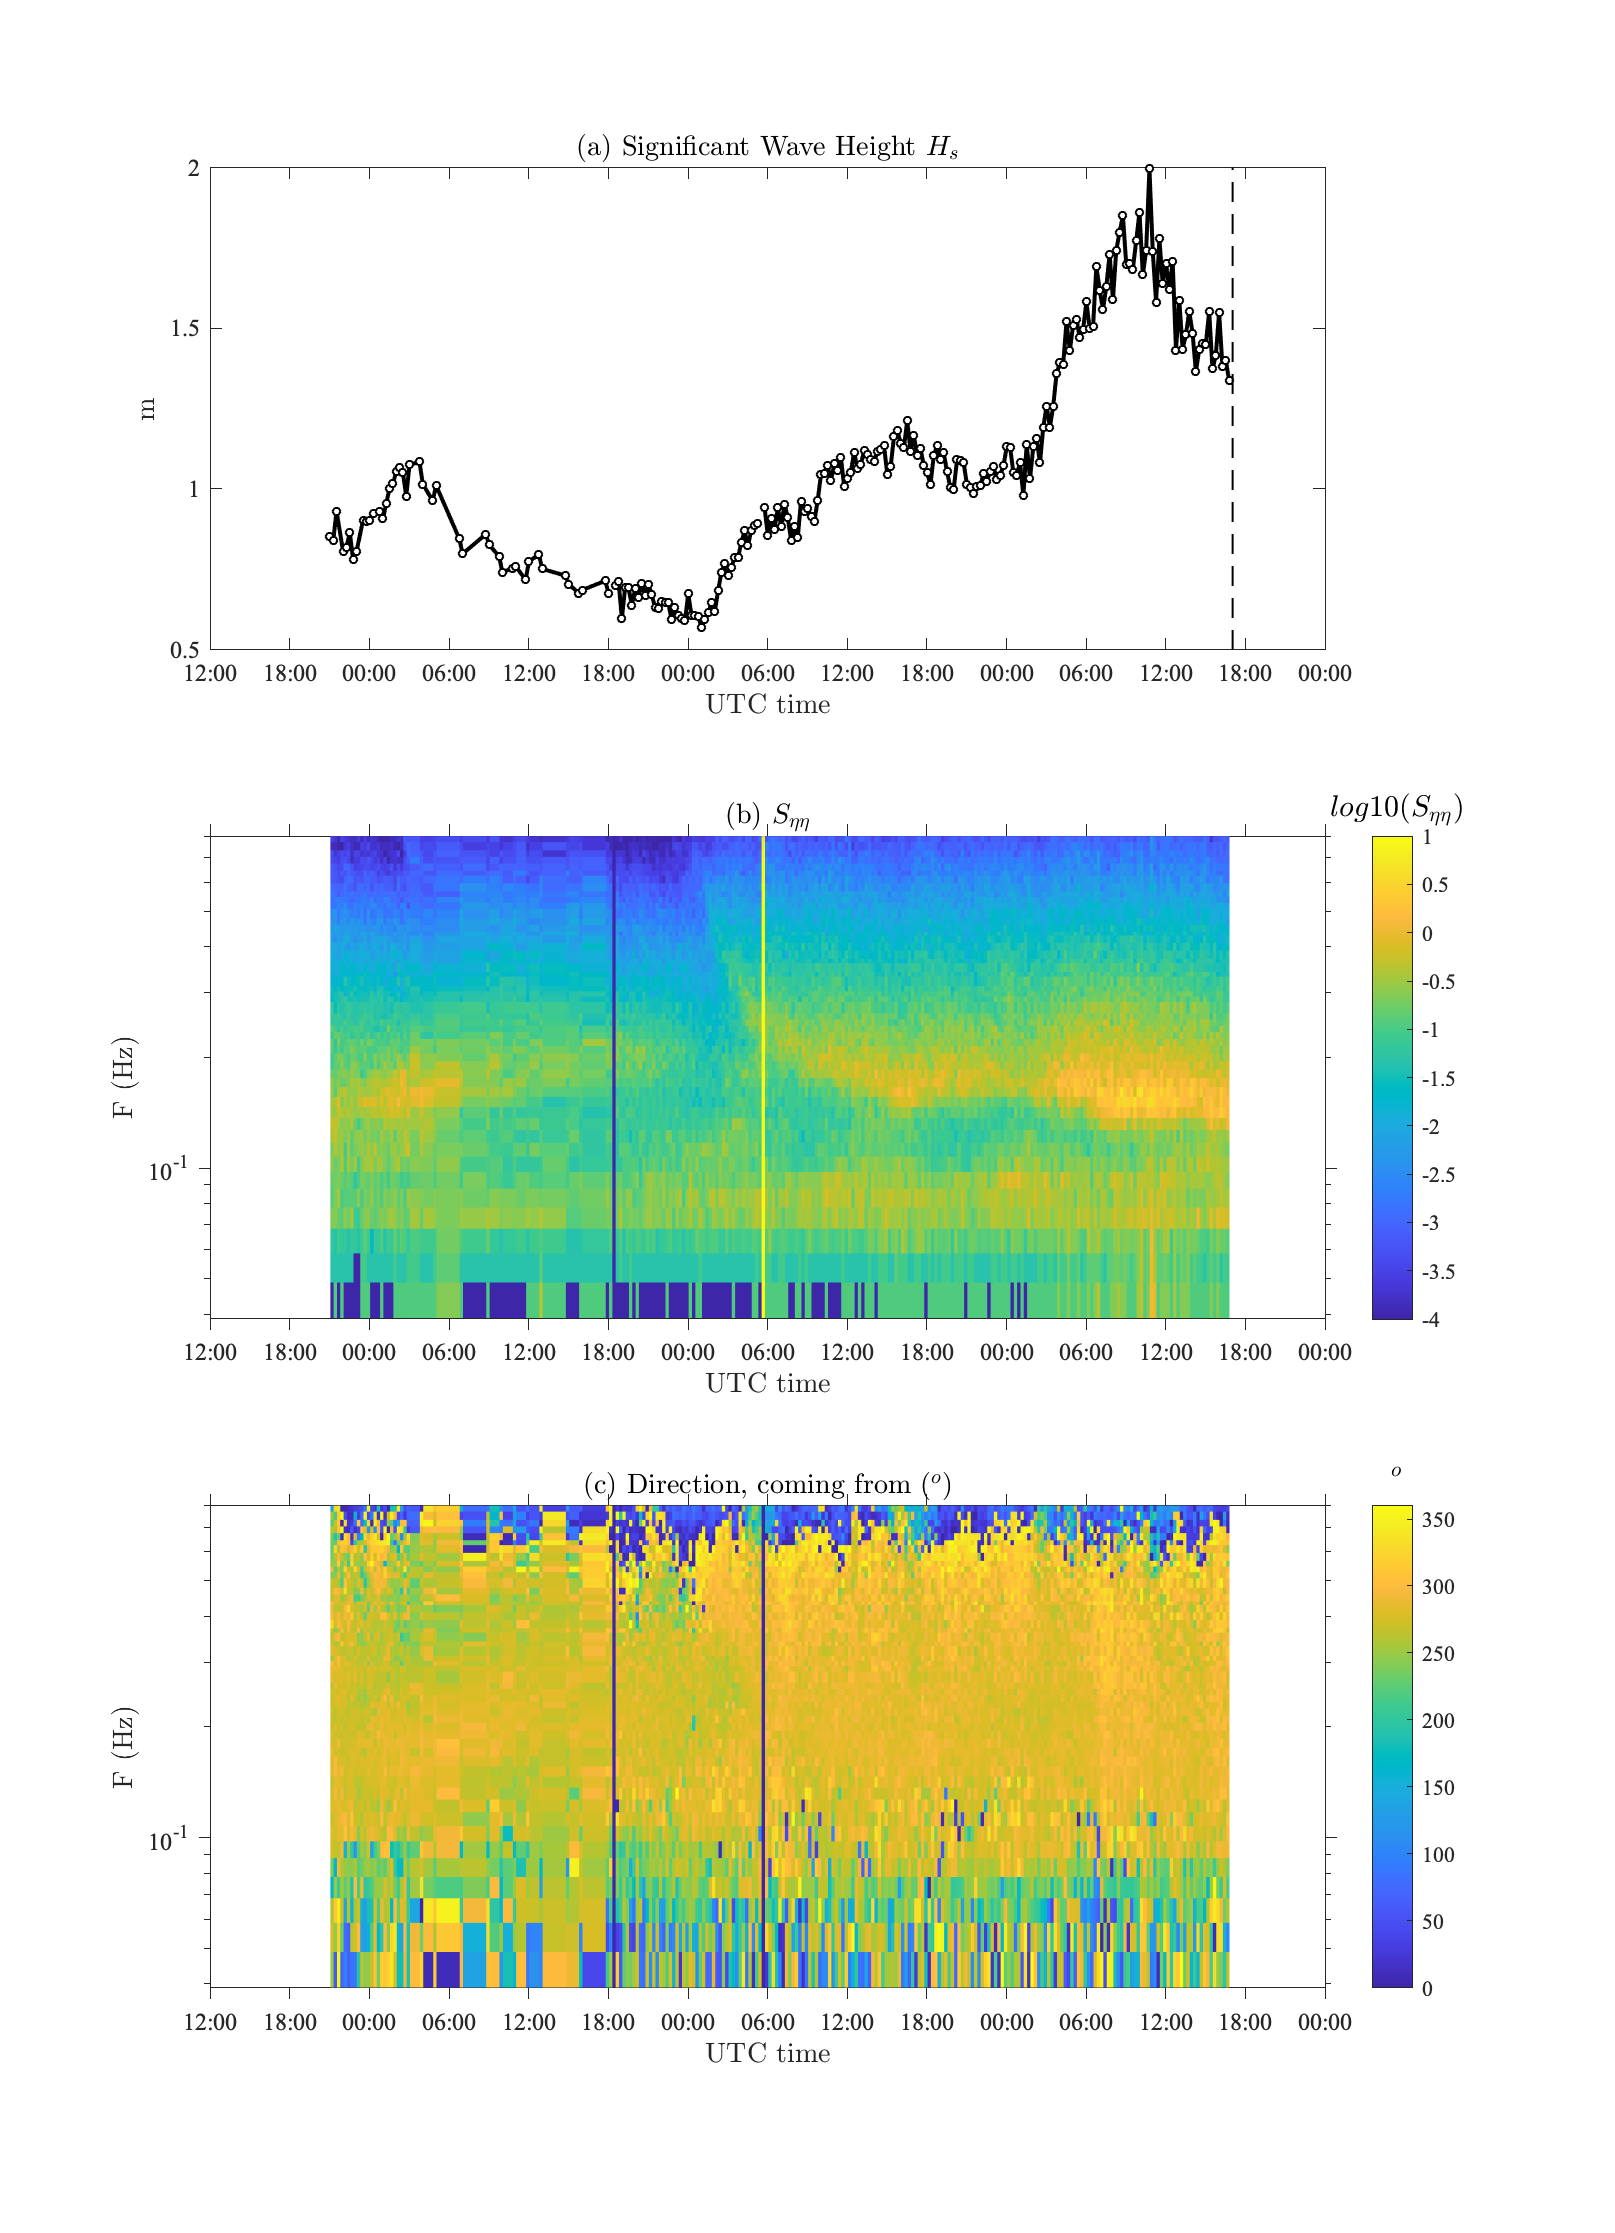

In [13]:
%% wave spectra
figure('Name','KELVIN');
set(gcf,'color',[1 1 1])
set(gcf,'position',[1000 221.6667 807.6667 1.1163e+03])
subplot(3,1,1)
t=find(KELVIN.PLD2_TAB1.Hs_fft==0 | KELVIN.PLD2_TAB1.Hs_fft<0);
KELVIN.PLD2_TAB1.Hs_fft(t)=NaN;
plot(KELVIN.PLD2_TAB1.time,KELVIN.PLD2_TAB1.Hs_fft,'k','linewidth',2)
hold on
plot(KELVIN.PLD2_TAB1.time,KELVIN.PLD2_TAB1.Hs_fft,'ok','linewidth',1,'MarkerFaceColor','w','MarkerSize',4)
a=xlim;
b= ylim;
plot([now+datenum(0,0,0,8,0,0) now+datenum(0,0,0,8,0,0)],b,'--k','linewidth',1)
datetick('keeplimits')
set(gca,'fontname','times','FontSize',12)
xlabel('UTC time','interpreter','latex','fontname', 'times','fontsize',14)
ylabel('m','interpreter','latex','fontname', 'times','fontsize',14)
 title('(a) Significant Wave Height $H_s$','interpreter','latex','fontname', 'times','fontsize',14)
 hc = colorbar;
set(hc,'visible','off')
subplot(3,1,2)
% [~,h] = contourf(repmat(KELVIN.PLD2_TAB2.time,[50 1]),KELVIN.PLD2_TAB2.z,KELVIN.PLD2_TAB2.current_north,100);
% set(h,'linestyle','none','LevelList',[-0.5:0.01:0.5])

 pcolor(KELVIN.PLD2_TAB3.time,KELVIN.PLD2_TAB3.freq,real(log10(KELVIN.PLD2_TAB3.Szz)));shading flat
% map=flipud(cbrewer('div','Spectral',60));
% colormap(map);
hc  = colorbar;
title(hc,'$log10(S_{\eta\eta})$','interpreter','latex','fontname', 'times','fontsize',12)
set(gca,'yscale','log')
xlim([a])
caxis([-4 1])

set(gca,'TickDir','out');
datetick('keeplimits') 
set(gca,'fontname','times','FontSize',12)
xlabel('UTC time','interpreter','latex','fontname', 'times','fontsize',14)
ylabel('F (Hz)','interpreter','latex','fontname', 'times','fontsize',14)

 title('(b) $S_{\eta\eta}$','interpreter','latex','fontname', 'times','fontsize',14)
subplot(3,1,3)
pcolor(KELVIN.PLD2_TAB3.time,KELVIN.PLD2_TAB3.freq,(KELVIN.PLD2_TAB3.theta));shading flat
% map=flipud(cbrewer('div','Spectral',60));
% colormap(map);
hc  = colorbar;
title(hc,'$^o$','interpreter','latex','fontname', 'times','fontsize',12)
set(gca,'yscale','log')
xlim([a])
caxis([0 360])
set(gca,'TickDir','out');
datetick('keeplimits') 
set(gca,'fontname','times','FontSize',12)
xlabel('UTC time','interpreter','latex','fontname', 'times','fontsize',14)
ylabel('F (Hz)','interpreter','latex','fontname', 'times','fontsize',14)

 title('(c) Direction, coming from ($^o$)','interpreter','latex','fontname', 'times','fontsize',14)


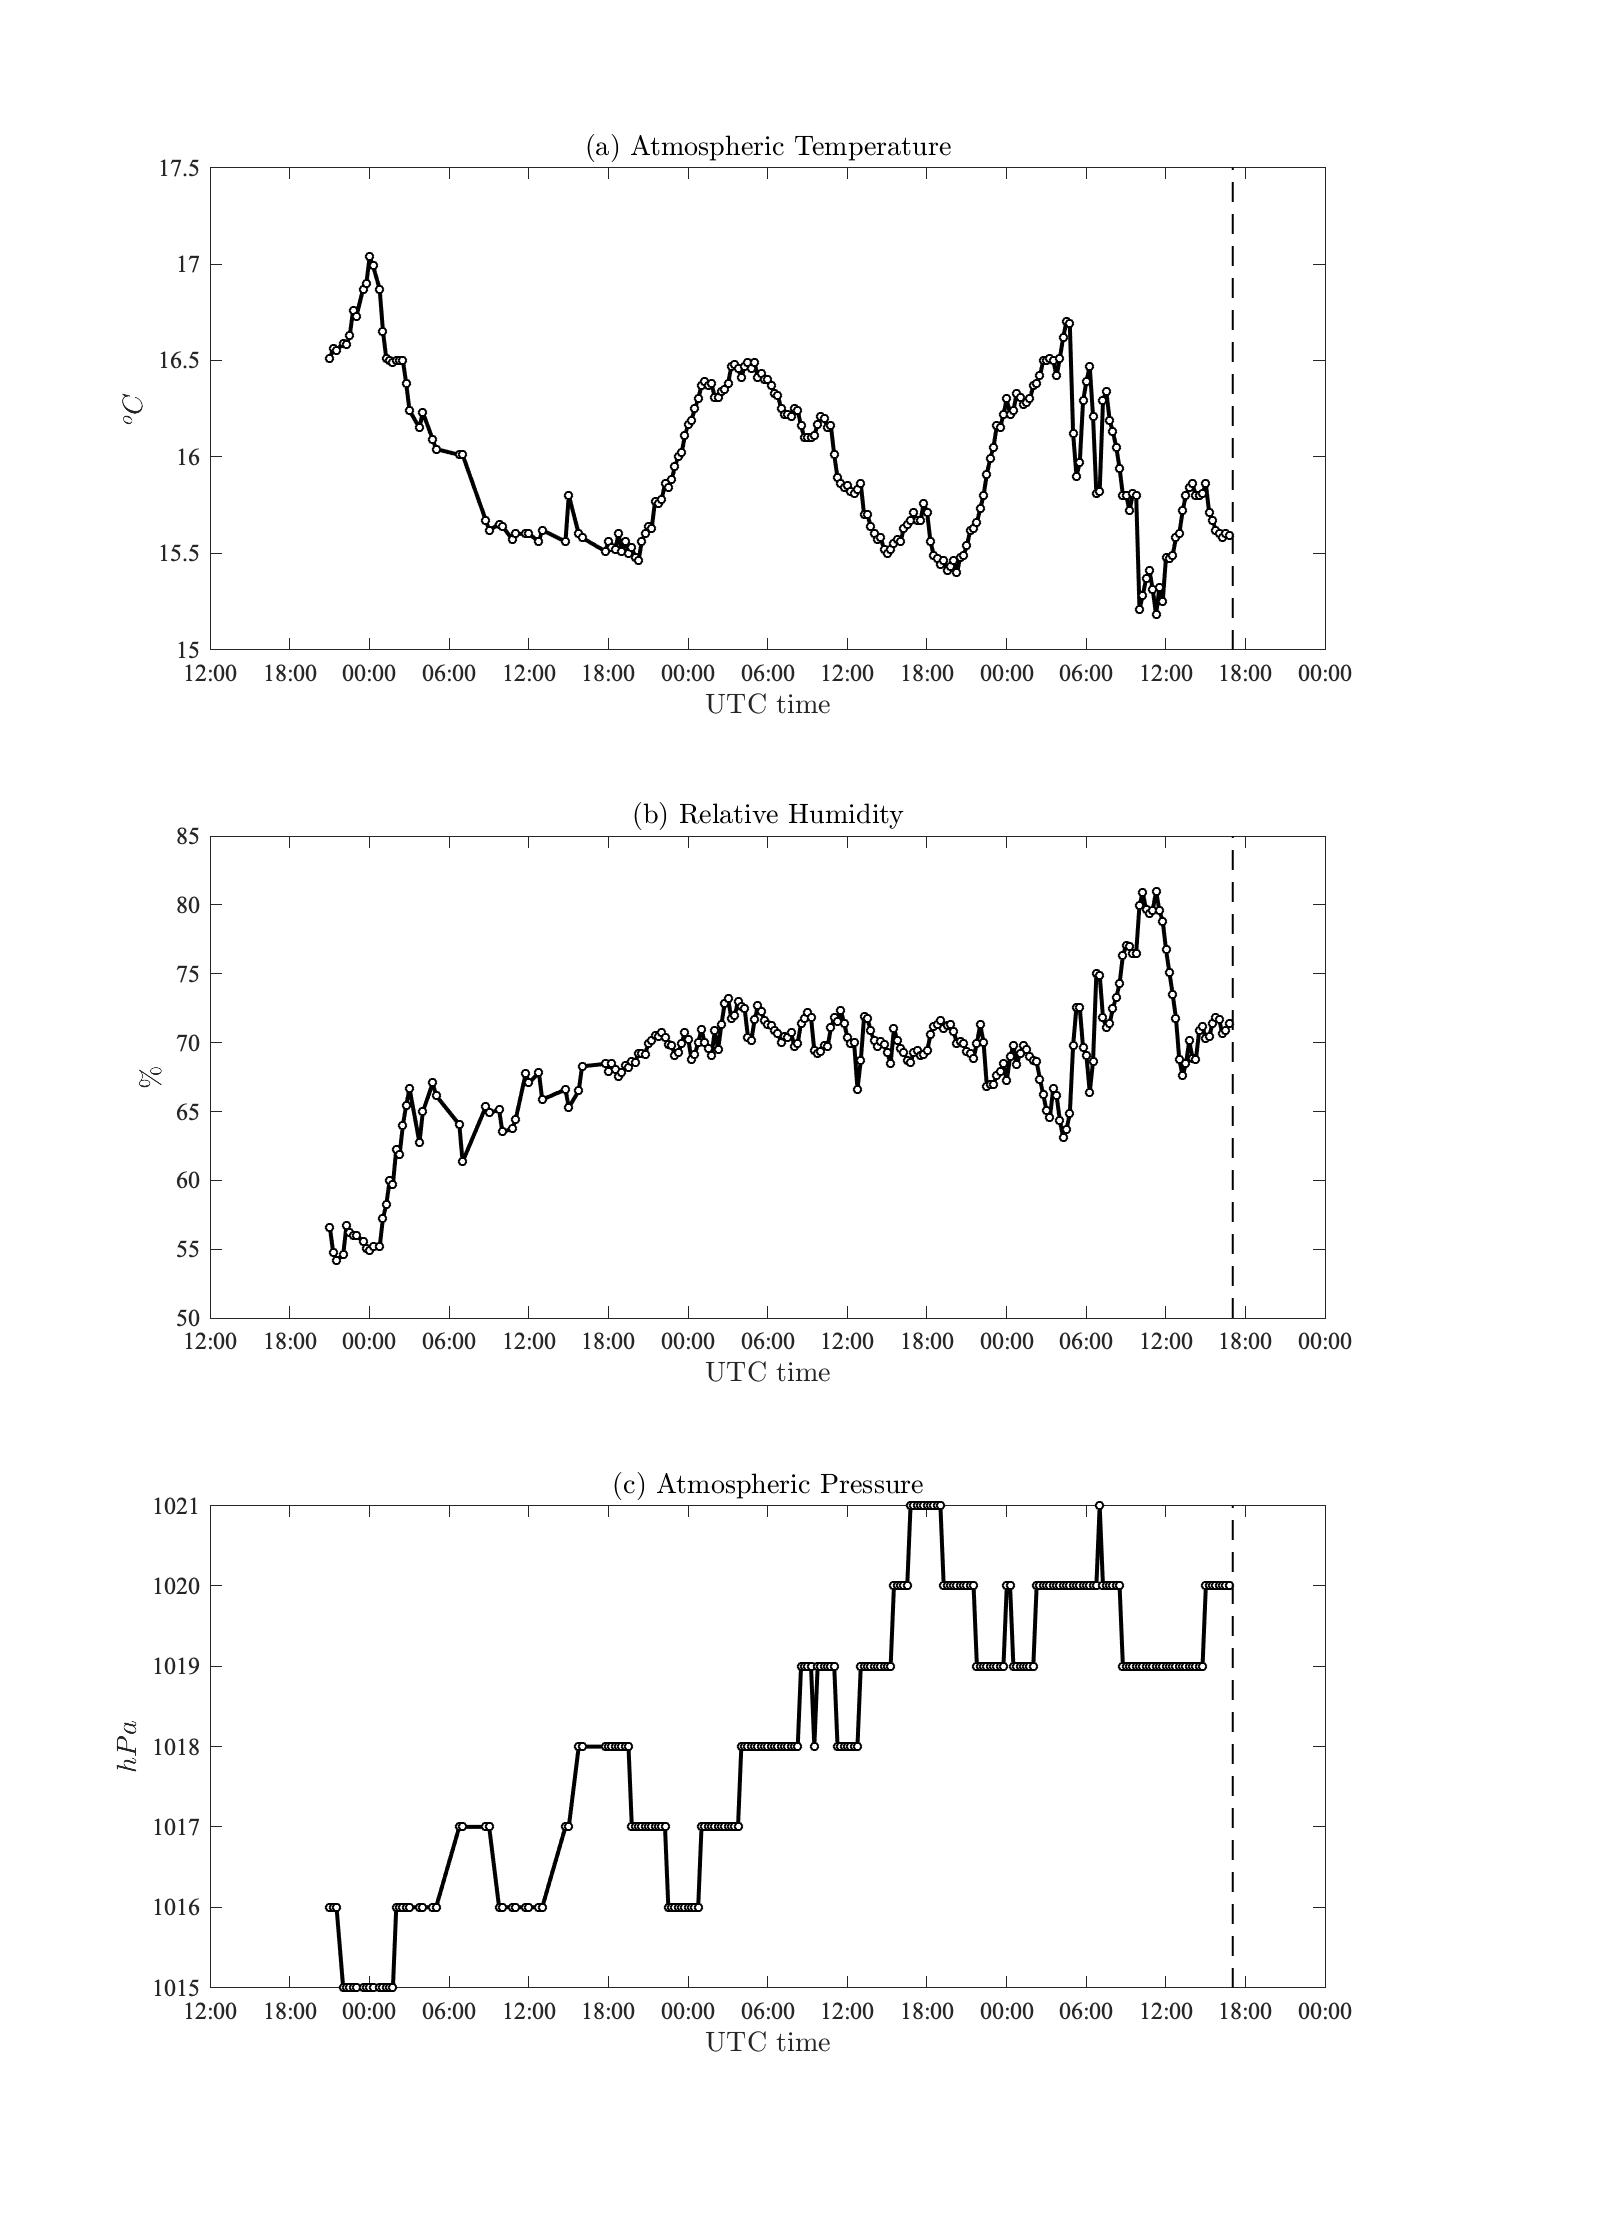

In [14]:
 %% Atmospheric temperature, humidity 
 
figure('Name','KELVIN');
set(gcf,'color',[1 1 1])
set(gcf,'position',[1000 221.6667 807.6667 1.1163e+03])
subplot(3,1,1)
t=find(KELVIN.PLD2_TAB1.Atmospheric_Temperature==0);
KELVIN.PLD2_TAB1.Atmospheric_Temperature(t)=NaN;
plot(KELVIN.PLD2_TAB1.time,KELVIN.PLD2_TAB1.Atmospheric_Temperature,'k','linewidth',2)
hold on
plot(KELVIN.PLD2_TAB1.time,KELVIN.PLD2_TAB1.Atmospheric_Temperature,'ok','linewidth',1,'MarkerFaceColor','w','MarkerSize',4)
a=xlim;
b= ylim;
plot([now+datenum(0,0,0,8,0,0) now+datenum(0,0,0,8,0,0)],b,'--k','linewidth',1)
datetick('keeplimits')

set(gca,'fontname','times','FontSize',12)
xlabel('UTC time','interpreter','latex','fontname', 'times','fontsize',14)
ylabel('$^oC$','interpreter','latex','fontname', 'times','fontsize',14)
 title('(a) Atmospheric Temperature','interpreter','latex','fontname', 'times','fontsize',14)
 hc = colorbar;
set(hc,'visible','off')
subplot(3,1,2)
t=find(KELVIN.PLD2_TAB1.Relative_Humidity==0);
KELVIN.PLD2_TAB1.Relative_Humidity(t)=NaN;
plot(KELVIN.PLD2_TAB1.time,KELVIN.PLD2_TAB1.Relative_Humidity,'k','linewidth',2)
hold on
plot(KELVIN.PLD2_TAB1.time,KELVIN.PLD2_TAB1.Relative_Humidity,'ok','linewidth',1,'MarkerFaceColor','w','MarkerSize',4)
a=xlim;
b= ylim;
plot([now+datenum(0,0,0,8,0,0) now+datenum(0,0,0,8,0,0)],b,'--k','linewidth',1)
datetick('keeplimits')

set(gca,'fontname','times','FontSize',12)
xlabel('UTC time','interpreter','latex','fontname', 'times','fontsize',14)
ylabel('$\%$','interpreter','latex','fontname', 'times','fontsize',14)
 title('(b) Relative Humidity','interpreter','latex','fontname', 'times','fontsize',14)
 hc = colorbar;
set(hc,'visible','off')
subplot(3,1,3)
t=find(KELVIN.PLD2_TAB1.Atmospheric_Pressure==0);
KELVIN.PLD2_TAB1.Atmospheric_Pressure(t)=NaN;
plot(KELVIN.PLD2_TAB1.time,KELVIN.PLD2_TAB1.Atmospheric_Pressure,'k','linewidth',2)
hold on
plot(KELVIN.PLD2_TAB1.time,KELVIN.PLD2_TAB1.Atmospheric_Pressure,'ok','linewidth',1,'MarkerFaceColor','w','MarkerSize',4)
a=xlim;
b= ylim;
plot([now+datenum(0,0,0,8,0,0) now+datenum(0,0,0,8,0,0)],b,'--k','linewidth',1)
datetick('keeplimits')
set(gca,'fontname','times','FontSize',12)
xlabel('UTC time','interpreter','latex','fontname', 'times','fontsize',14)
ylabel('$hPa$','interpreter','latex','fontname', 'times','fontsize',14)
 title('(c) Atmospheric Pressure','interpreter','latex','fontname', 'times','fontsize',14)
 hc = colorbar;
set(hc,'visible','off')

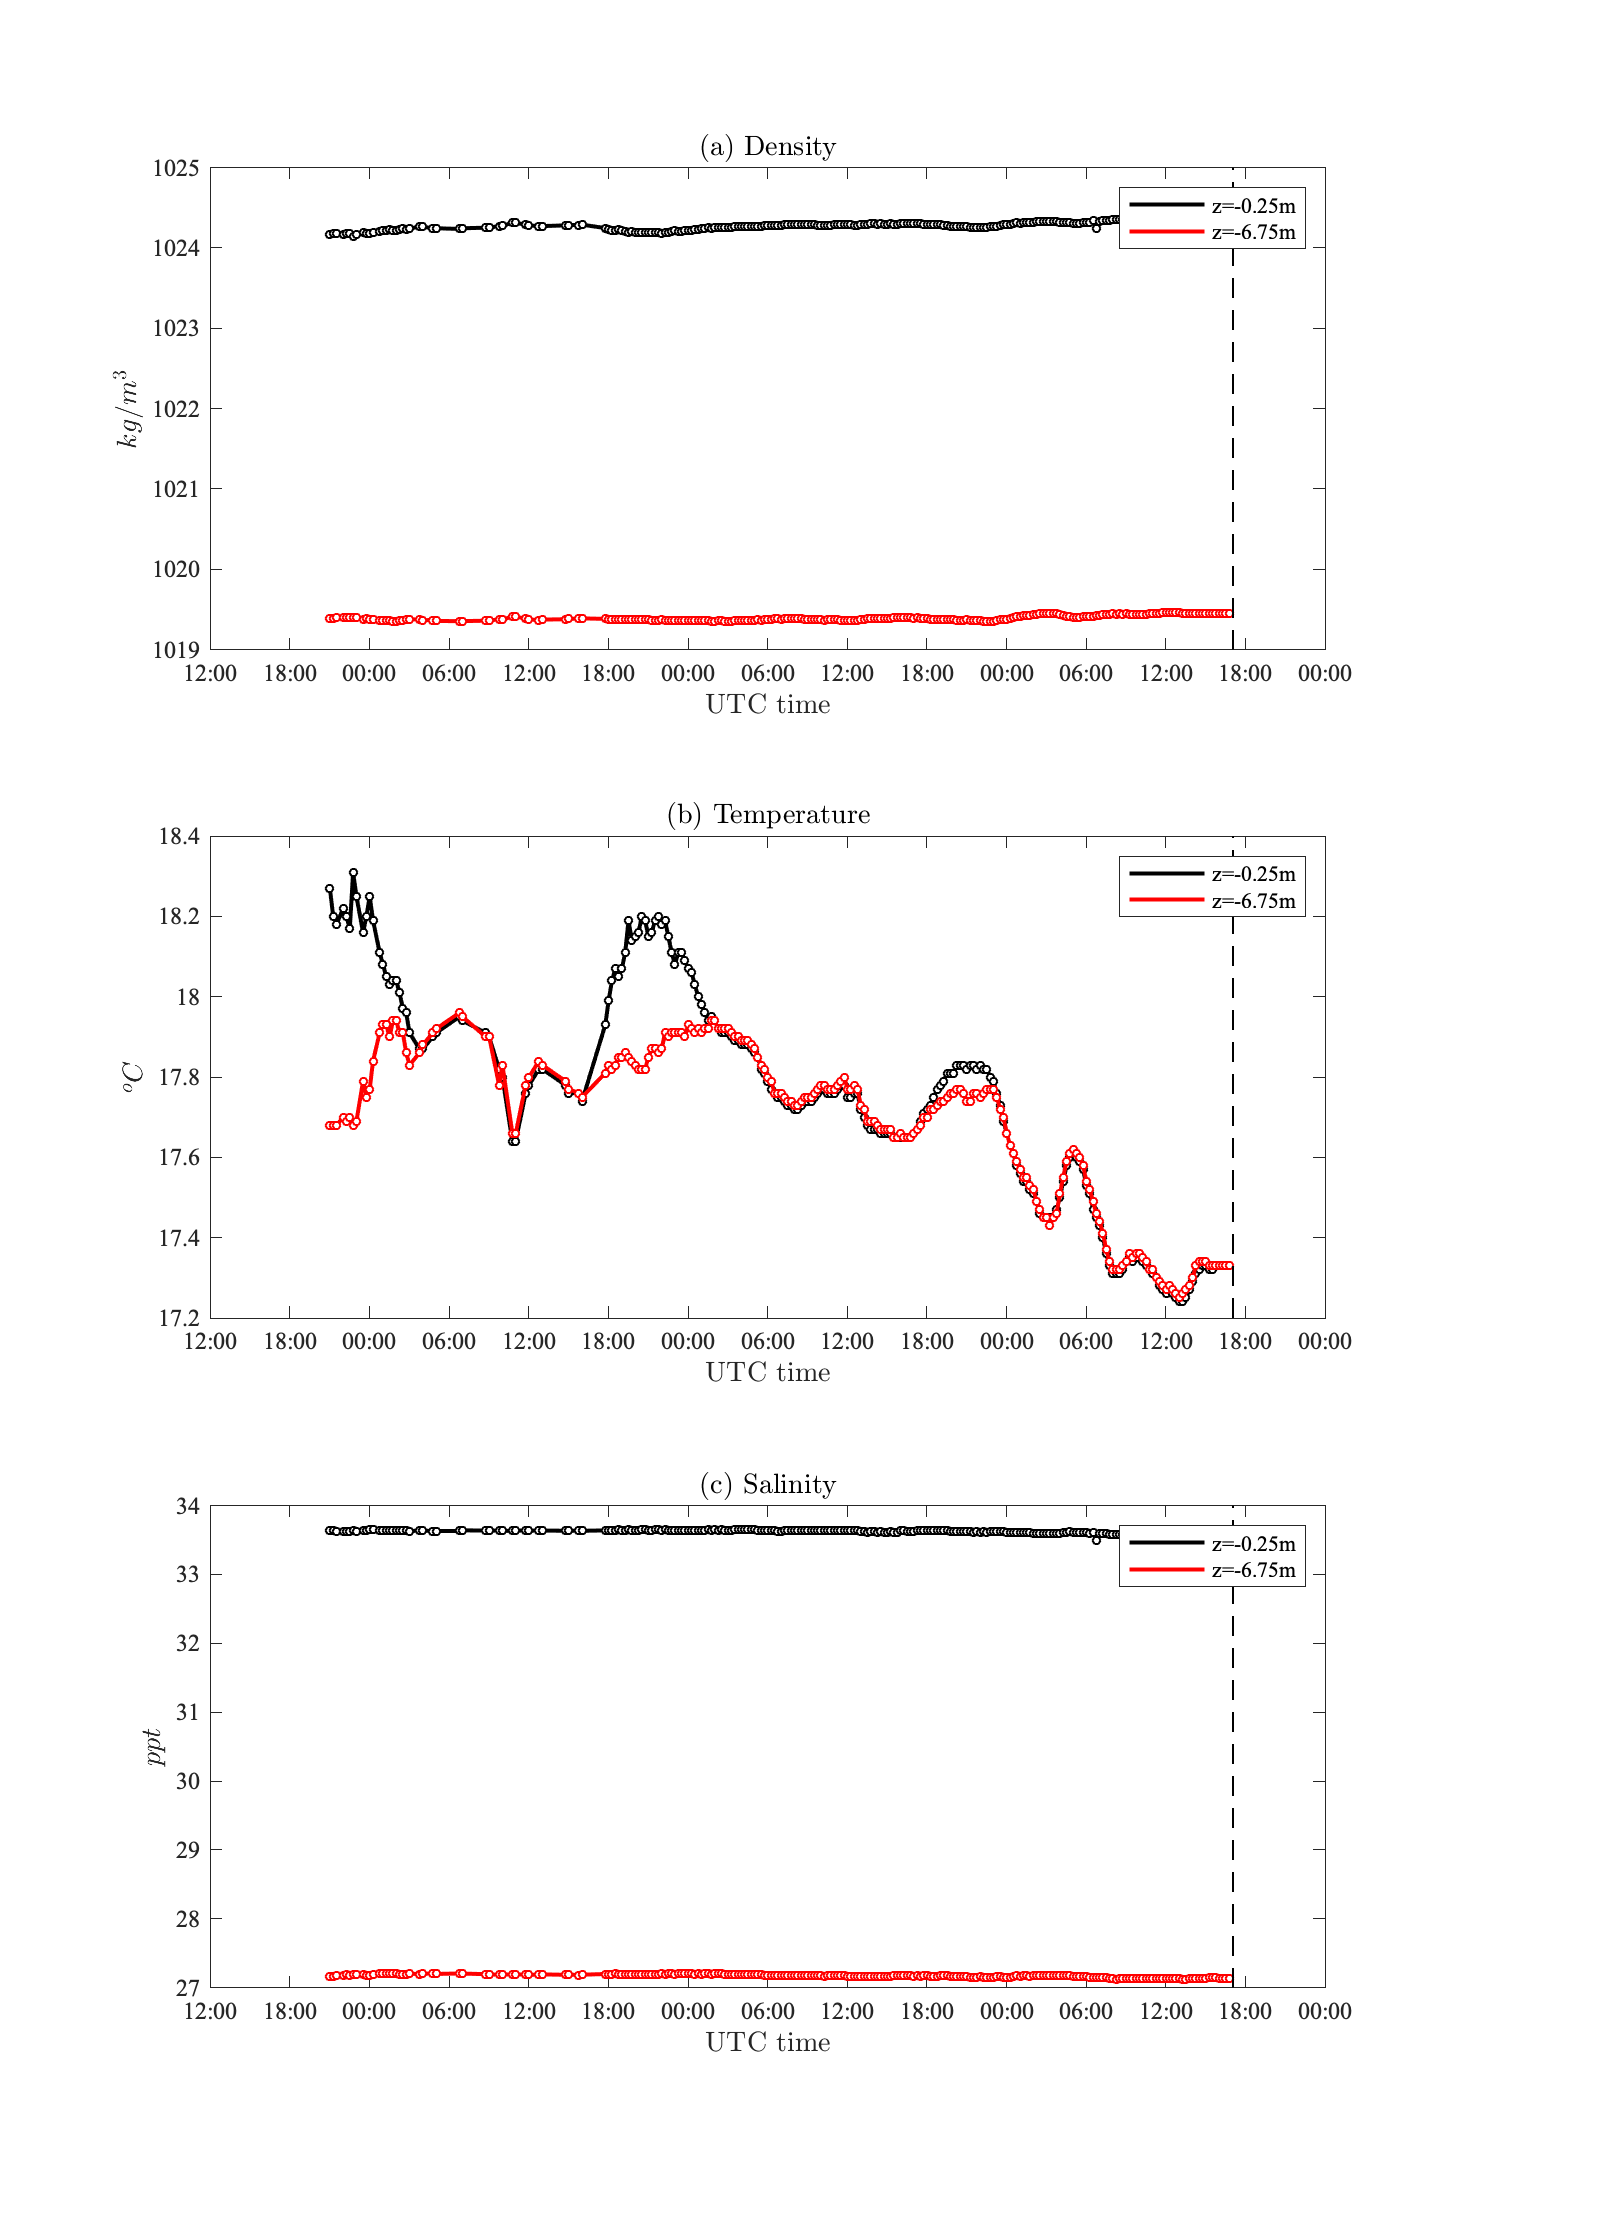

In [15]:
%% CTDs

figure('Name','KELVIN');
set(gcf,'color',[1 1 1])
set(gcf,'position',[1000 221.6667 807.6667 1.1163e+03])
subplot(3,1,1)
t=find(KELVIN.PLD2_TAB1.uctd_dens==0);
KELVIN.PLD2_TAB1.uctd_dens(t)=NaN;
h1 = plot(KELVIN.PLD2_TAB1.time,KELVIN.PLD2_TAB1.uctd_dens,'k','linewidth',2);
hold on
plot(KELVIN.PLD2_TAB1.time,KELVIN.PLD2_TAB1.uctd_dens,'ok','linewidth',1,'MarkerFaceColor','w','MarkerSize',4)
t=find(KELVIN.PLD2_TAB1.lctd_dens==0);
KELVIN.PLD2_TAB1.lctd_dens(t)=NaN;
h2 = plot(KELVIN.PLD2_TAB1.time,KELVIN.PLD2_TAB1.lctd_dens,'r','linewidth',2);
hold on
plot(KELVIN.PLD2_TAB1.time,KELVIN.PLD2_TAB1.lctd_dens,'or','linewidth',1,'MarkerFaceColor','w','MarkerSize',4)
a=xlim;
b= ylim;
plot([now+datenum(0,0,0,8,0,0) now+datenum(0,0,0,8,0,0)],b,'--k','linewidth',1)
datetick('keeplimits')
legend([h1 h2],{'z=-0.25m','z=-6.75m'})
set(gca,'fontname','times','FontSize',12)
xlabel('UTC time','interpreter','latex','fontname', 'times','fontsize',14)
ylabel('$kg/m^3$','interpreter','latex','fontname', 'times','fontsize',14)
 title('(a) Density','interpreter','latex','fontname', 'times','fontsize',14)
 hc = colorbar;
set(hc,'visible','off')
subplot(3,1,2)
t=find(KELVIN.PLD2_TAB1.uctd_dens==0);
KELVIN.PLD2_TAB1.uctd_temp(t)=NaN;
h1 = plot(KELVIN.PLD2_TAB1.time,KELVIN.PLD2_TAB1.uctd_temp,'k','linewidth',2);
hold on
plot(KELVIN.PLD2_TAB1.time,KELVIN.PLD2_TAB1.uctd_temp,'ok','linewidth',1,'MarkerFaceColor','w','MarkerSize',4)
t=find(KELVIN.PLD2_TAB1.lctd_temp==0);
KELVIN.PLD2_TAB1.lctd_temp(t)=NaN;
h2 = plot(KELVIN.PLD2_TAB1.time,KELVIN.PLD2_TAB1.lctd_temp,'r','linewidth',2);
hold on
plot(KELVIN.PLD2_TAB1.time,KELVIN.PLD2_TAB1.lctd_temp,'or','linewidth',1,'MarkerFaceColor','w','MarkerSize',4)
a=xlim;
b= ylim;
plot([now+datenum(0,0,0,8,0,0) now+datenum(0,0,0,8,0,0)],b,'--k','linewidth',1)
datetick('keeplimits')
legend([h1 h2],{'z=-0.25m','z=-6.75m'})
set(gca,'fontname','times','FontSize',12)
xlabel('UTC time','interpreter','latex','fontname', 'times','fontsize',14)
ylabel('$^oC$','interpreter','latex','fontname', 'times','fontsize',14)
 title('(b) Temperature','interpreter','latex','fontname', 'times','fontsize',14)
 hc = colorbar;
set(hc,'visible','off')
subplot(3,1,3)
t=find(KELVIN.PLD2_TAB1.uctd_sali==0);
KELVIN.PLD2_TAB1.uctd_sali(t)=NaN;
h1 = plot(KELVIN.PLD2_TAB1.time,KELVIN.PLD2_TAB1.uctd_sali,'k','linewidth',2);
hold on
plot(KELVIN.PLD2_TAB1.time,KELVIN.PLD2_TAB1.uctd_sali,'ok','linewidth',1,'MarkerFaceColor','w','MarkerSize',4)
t=find(KELVIN.PLD2_TAB1.lctd_sali==0);
KELVIN.PLD2_TAB1.lctd_sali(t)=NaN;
h2 = plot(KELVIN.PLD2_TAB1.time,KELVIN.PLD2_TAB1.lctd_sali,'r','linewidth',2);
hold on
plot(KELVIN.PLD2_TAB1.time,KELVIN.PLD2_TAB1.lctd_sali,'or','linewidth',1,'MarkerFaceColor','w','MarkerSize',4)
a=xlim;
b= ylim;
plot([now+datenum(0,0,0,8,0,0) now+datenum(0,0,0,8,0,0)],b,'--k','linewidth',1)
datetick('keeplimits')
legend([h1 h2],{'z=-0.25m','z=-6.75m'})
set(gca,'fontname','times','FontSize',12)
xlabel('UTC time','interpreter','latex','fontname', 'times','fontsize',14)
ylabel('$ppt$','interpreter','latex','fontname', 'times','fontsize',14)
 title('(c) Salinity','interpreter','latex','fontname', 'times','fontsize',14)
 hc = colorbar;
set(hc,'visible','off')


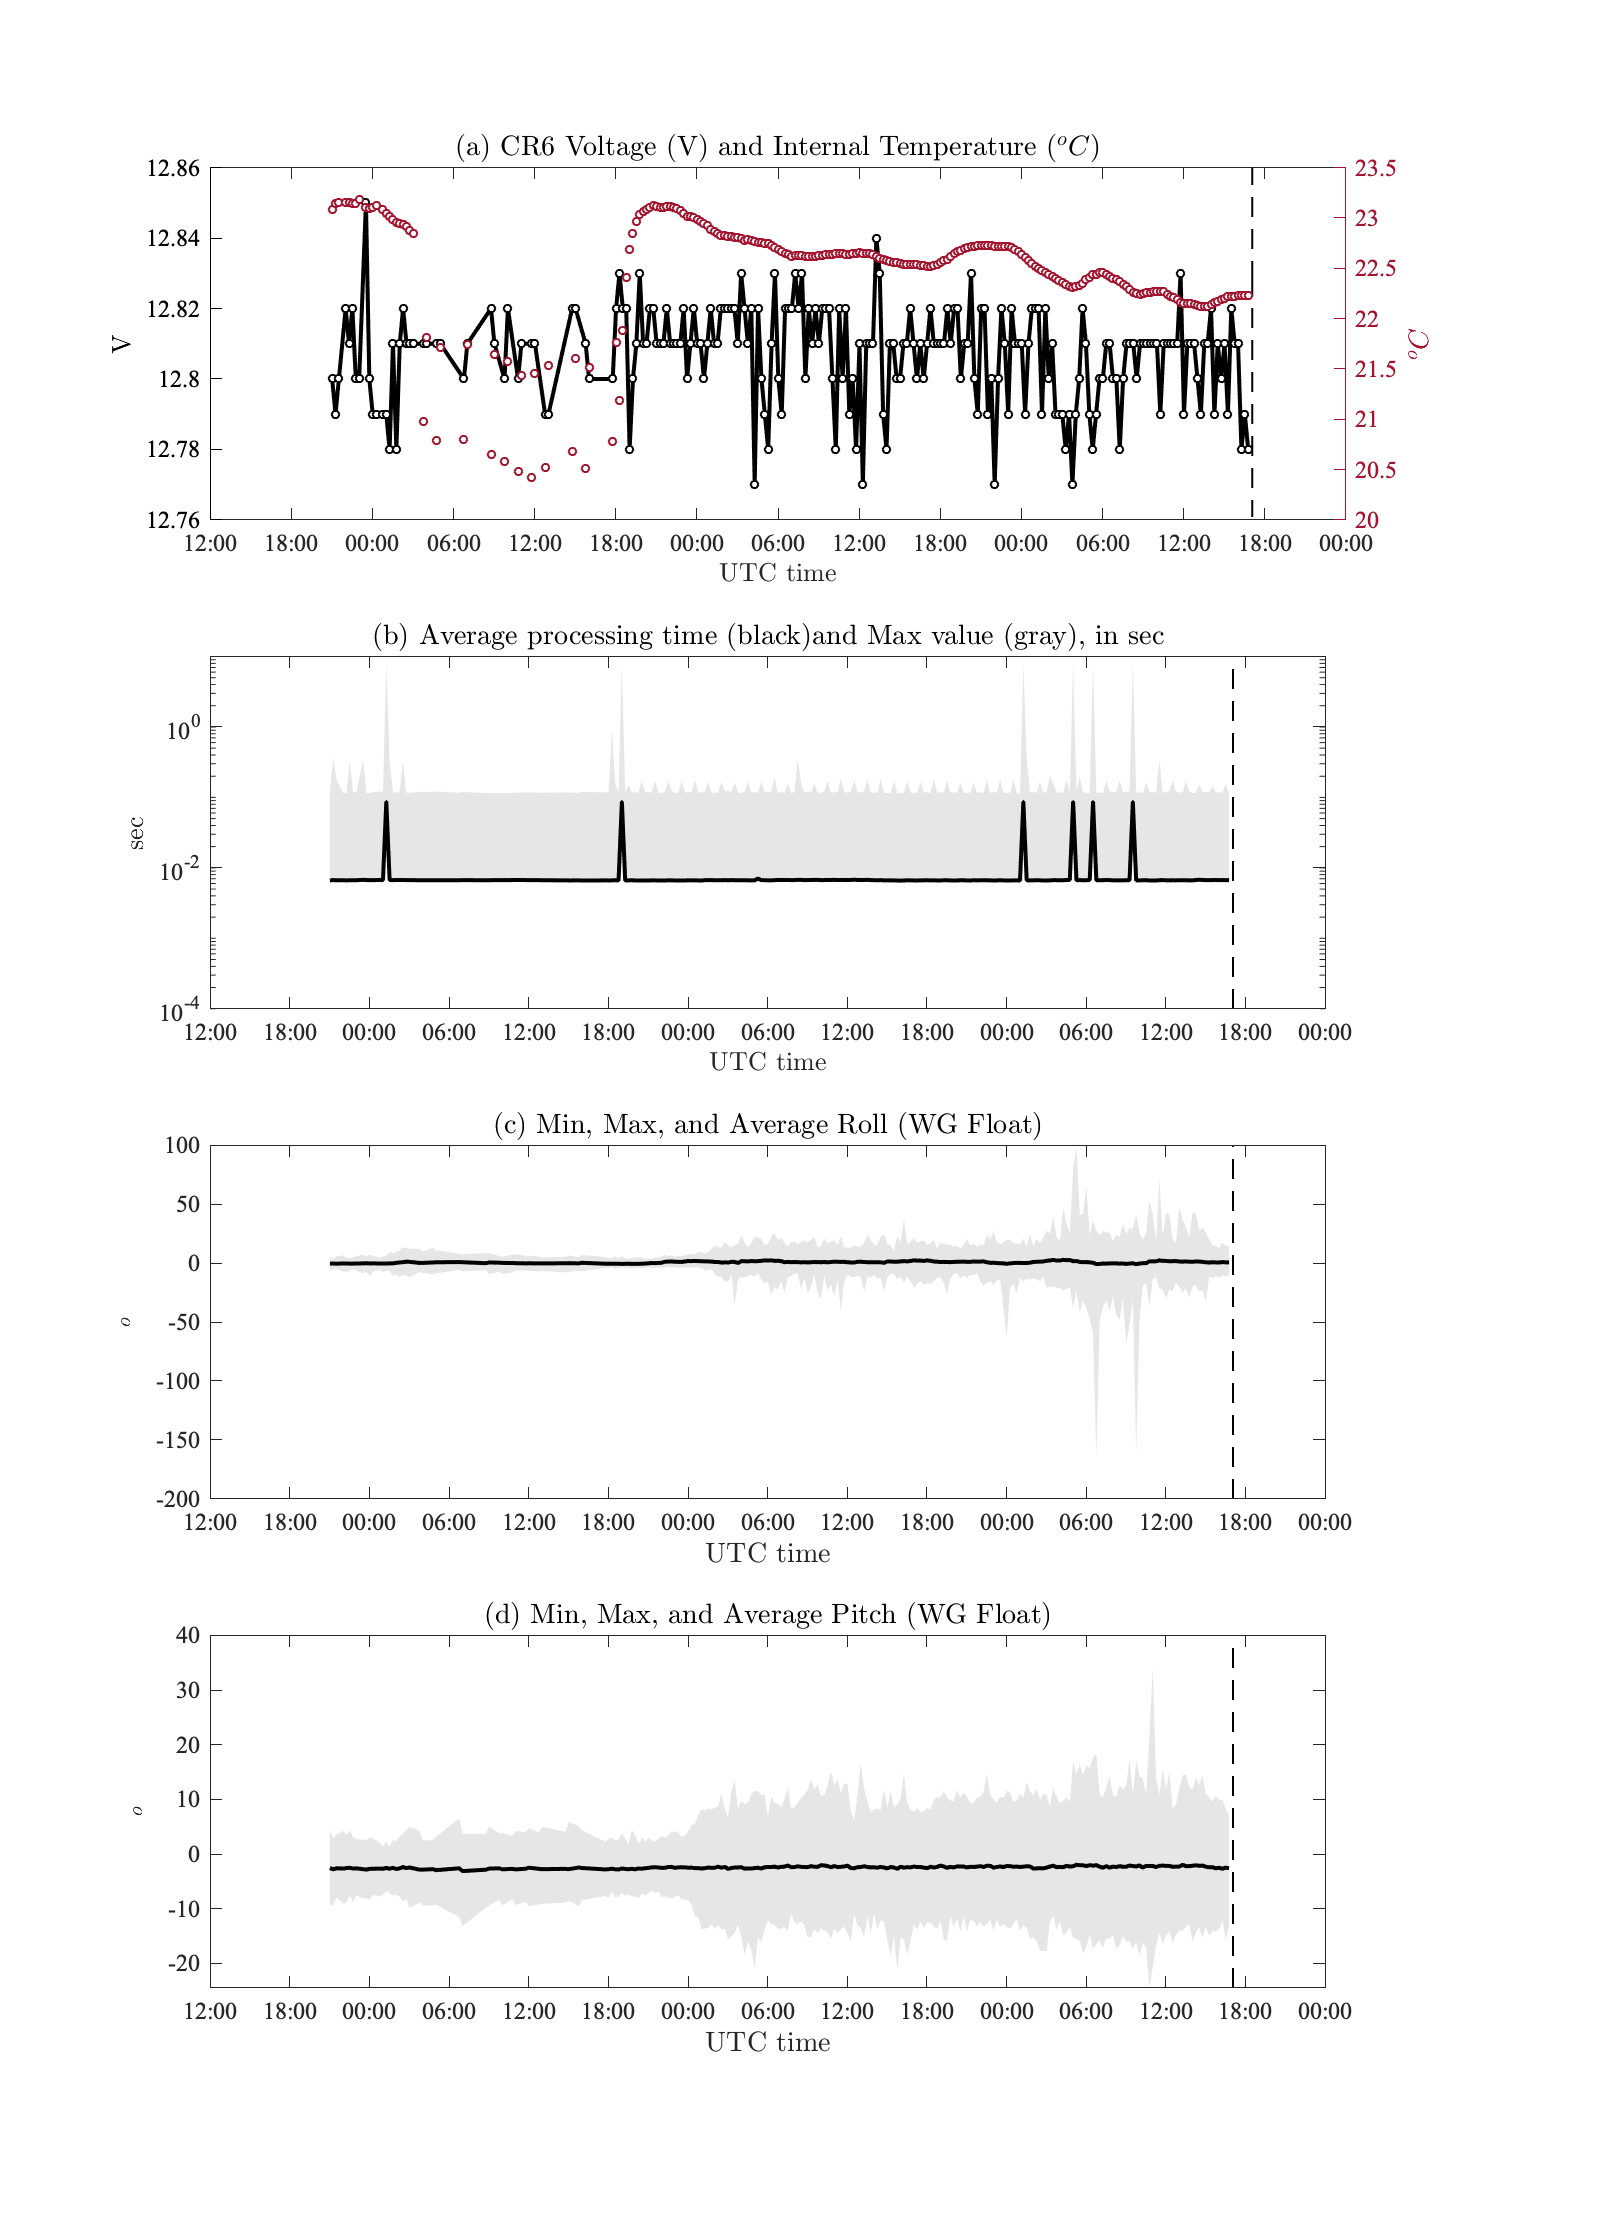

In [16]:
%% float attitude and other CR6 stuff
figure('Name','KELVIN');
set(gcf,'color',[1 1 1])
set(gcf,'position',[1000 221.6667 807.6667 1.1163e+03])
subplot(4,1,1)
yyaxis left
aaa = get(gca,'position');
set(gca,'position',[aaa(1) aaa(2) 0.7024 aaa(4)])

plot(KELVIN.PLD2_TAB1.time,KELVIN.PLD2_TAB1.Voltage_CR6_MIN,'k','linewidth',2)
hold on
plot(KELVIN.PLD2_TAB1.time,KELVIN.PLD2_TAB1.Voltage_CR6_MIN,'ok','linewidth',1,'MarkerFaceColor','w','MarkerSize',4)
datetick('keeplimits') 
a=xlim;
b= ylim;
plot([now+datenum(0,0,0,8,0,0) now+datenum(0,0,0,8,0,0)],b,'--k','linewidth',1)
xlabel('UTC time','interpreter','latex','fontname', 'times','fontsize',14)
ylabel('V','interpreter','latex','fontname', 'times','fontsize',14)

set(gca,'fontname','times','FontSize',12)
  hc = colorbar;
 set(hc,'visible','off')
yyaxis right
plot(KELVIN.PLD2_TAB1.time,KELVIN.PLD2_TAB1.Temperature_CR6_AVG,'or','color', [0.64 0.08 0.18],'linewidth',1,'MarkerFaceColor','w','MarkerSize',4)
aaa = get(gca,'position');
set(gca,'position',[aaa(1) aaa(2) 0.7024 aaa(4)])

datetick('keeplimits') 
ax = gca;
ax.YAxis(1).Color = 'k';
ax.YAxis(2).Color = [0.64 0.08 0.18];

set(gca,'fontname','times','FontSize',12)
ylabel('$^oC$','interpreter','latex','fontname', 'times','fontsize',14)

 title('(a) CR6 Voltage (V) and Internal Temperature  ($^oC$)','interpreter','latex','fontname', 'times','fontsize',14)

 subplot(4,1,2)
 fill([KELVIN.PLD2_TAB1.time';flipud(KELVIN.PLD2_TAB1.time')],[KELVIN.PLD2_TAB1.Processing_Time_AVG'/1000;flipud(KELVIN.PLD2_TAB1.Processing_Time_MAX'/1000)],[.9 .9 .9],'linestyle','none');
 set(gca,'yscale','log')
 hold on
 plot(KELVIN.PLD2_TAB1.time,KELVIN.PLD2_TAB1.Processing_Time_AVG/1000,'k','linewidth',2,'MarkerFaceColor','w','MarkerSize',4)
datetick('keeplimits') 
a=xlim;
ylim([0.1 10000]/1000)
 b= ylim;
plot([now+datenum(0,0,0,8,0,0) now+datenum(0,0,0,8,0,0)],b,'--k','linewidth',1)
xlabel('UTC time','interpreter','latex','fontname', 'times','fontsize',14)
ylabel('sec','interpreter','latex','fontname', 'times','fontsize',14)

set(gca,'fontname','times','FontSize',12)
  hc = colorbar;
 set(hc,'visible','off')
 title('(b) Average processing time (black)and Max value (gray), in sec','interpreter','latex','fontname', 'times','fontsize',14)
  newposit=get(gca,'position');
 oldposit=get(ax,'position');
 set(ax,'position',[oldposit(1) oldposit(2) newposit(3) oldposit(4)])

 subplot(4,1,3)
 fill([KELVIN.PLD2_TAB1.time';flipud(KELVIN.PLD2_TAB1.time')],[KELVIN.PLD2_TAB1.roll_xsens_Min';flipud(KELVIN.PLD2_TAB1.roll_xsens_Max')],[.9 .9 .9],'linestyle','none');
 hold on
 plot(KELVIN.PLD2_TAB1.time,KELVIN.PLD2_TAB1.roll_xsens_Avg,'k','linewidth',2,'MarkerFaceColor','w','MarkerSize',4)
datetick('keeplimits') 
a=xlim;
set(gca,'fontname','times','FontSize',12)

xlabel('UTC time','interpreter','latex','fontname', 'times','fontsize',14)
ylabel('$^o$','interpreter','latex','fontname', 'times','fontsize',14)

  hc = colorbar;
 set(hc,'visible','off')
  b= ylim;
plot([now+datenum(0,0,0,8,0,0) now+datenum(0,0,0,8,0,0)],b,'--k','linewidth',1)
ylim([b])
title('(c) Min, Max, and Average Roll (WG Float)','interpreter','latex','fontname', 'times','fontsize',14)
subplot(4,1,4)
 fill([KELVIN.PLD2_TAB1.time';flipud(KELVIN.PLD2_TAB1.time')],[KELVIN.PLD2_TAB1.pitch_xsens_Min';flipud(KELVIN.PLD2_TAB1.pitch_xsens_Max')],[.9 .9 .9],'linestyle','none');
 hold on
 plot(KELVIN.PLD2_TAB1.time,KELVIN.PLD2_TAB1.pitch_xsens_Avg,'k','linewidth',2,'MarkerFaceColor','w','MarkerSize',4)
datetick('keeplimits') 
a=xlim;
set(gca,'fontname','times','FontSize',12)

xlabel('UTC time','interpreter','latex','fontname', 'times','fontsize',14)
ylabel('$^o$','interpreter','latex','fontname', 'times','fontsize',14)

  hc = colorbar;
 set(hc,'visible','off')
  b= ylim;
plot([now+datenum(0,0,0,8,0,0) now+datenum(0,0,0,8,0,0)],b,'--k','linewidth',1)
ylim([b])
title('(d) Min, Max, and Average Pitch (WG Float)','interpreter','latex','fontname', 'times','fontsize',14)


Notes
-------


* temp drop 
* H_s plot interesting, looks like a small windswell was kicked up (cf spectrogram and wind plots).

